# **Abstact**

This report examines multiple health determinants within United States counties that contribute to the health outcomes and life expectancy of individuals. Utilizing data obtained from the County Health Rankings & Roadmaps report.

In summary, the comprehensive analysis reveals a compelling connection between various factors and life expectancy.
The variables examined in this study, including injury-related fatalities, teen birth rate, smoking, obesity, chlamydia rates, poverty, hospital stays,PM2.5, excessive drinking and physicians ratio have been found to exert significant influences on individuals’ life expectancy.

One of the most significant implications from the decision tree is the recognition of the profound impact of teen birth rate on life expectancy. This highlights the potential benefits of investing in comprehensive teen pregnancy prevention programs, which could positively influence broader life expectancy trends.

The findings of this analysis emphasize the importance of tailored, data-driven approaches to public health, with an understanding that one size does not fit all. Each county possesses its unique set of challenges and strengths, making localized and targeted interventions essential for driving positive health outcomes.


# **Introduction**

The County Health Data demonstrates the components that influence how long and how well we live. The goal of this analysis is to use US county-level data to identify the health factors and health behaviors that have the important influence on the life expectancy.

In this research, we  evaluated six advanced machine learning models as follows:

*   K-Nearest Neighbors (KNN)

*   Elastic Net Regression

*   Lasso Regression

*   Decision Trees

*   Random Forests


Each model was analyzed for both predictive accuracy and interpretability. The comparative analysis focused on model performance metrics, and feature importance assessments were integral in identifying key predictors in the dataset.


To enhance public health strategies, this research seeks to uncover the most influential health factors and behaviors affecting life expectancy in US counties. Utilizing detailed county-level data, we aim to identify crucial predictors and determine the best machine learning model, thereby guiding targeted and effective health interventions.


The original data consists of 28 variables and 2552 observations. We try to find the best machine learning model from the data given since selecting the predictor variables is of utmost importance in the model building process.



In [1]:

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Read the data into a pandas DataFrame
url = 'https://docs.google.com/spreadsheets/d/1fenQH-xL33yidnt3uOkNzh5d8PXja-gv8HGUlX51F1A/export?format=csv'
df = pd.read_csv(url)

def descriptive_analysis(url):
    # Display basic structure of the DataFrame
    print("First Five Rows of the DataFrame:")
    print(df.head())
    print("\nDataFrame Shape (Rows, Columns):")
    print(df.shape)

    # Summary information
    print("\nDataFrame Info:")
    df.info()  # This will print directly

    # Statistical summary of numerical columns
    print("\nStatistical Summary:")
    print(df.describe())

    # Number of unique values in each column
    print("\nUnique Values in Each Column:")
    print(df.nunique())

    # Missing values in each column
    print("\nMissing Values in Each Column:")
    print(df.isnull().sum())

    # Correlation matrix - only for numerical columns
    print("\nCorrelation Matrix:")
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    print(numeric_df.corr())

# Run the function with the URL
descriptive_analysis(url)

First Five Rows of the DataFrame:
   FIPS    State     County  Life_Expectancy  Smoking  Obesity  Environment  \
0  1039  Alabama  Covington             72.9       21       45          6.9   
1  1041  Alabama   Crenshaw             72.6       22       40          6.4   
2  1043  Alabama    Cullman             73.9       21       38          7.5   
3  1045  Alabama       Dale             74.9       21       39          6.5   
4  1047  Alabama     Dallas             71.1       23       48          5.8   

   Physically_Inactive  Exercise_Opportunities  Excessive_Drinking  ...  \
0                   28                      58                  15  ...   
1                   31                      24                  15  ...   
2                   29                      48                  17  ...   
3                   29                      25                  16  ...   
4                   35                      56                  12  ...   

   High_School  Some_College  Unemployed

# **Descriptive Analysis**

- **Variables overview**
  - **Life Expectancy**: Varies significantly across counties with a mean of 76.83 years, reflecting disparities in health outcomes.
  - **Health Behaviors**: Includes smoking rates (average 20.06%), obesity prevalence (average 36.23%), and levels of physical inactivity (average 25.70%).
  - **Environmental Factors**: Assessed through the 'Environment' score with an average of 7.51, suggesting varied environmental quality across counties.
  - **Healthcare Access and Quality**: Measured through indicators like uninsured rates, physician and dentist ratios, and mental health provider availability.
  - **Socioeconomic Factors**: Includes unemployment rate (average 4.74%), poverty levels (average 19.76%), income ratio (average 4.53), and education metrics like high school and college completion rates.


We select TOP10 variables using the variable importance measure from elastic net regression which has the lowest RMSE.

We can interpret the coefficients as follows:

  - Injury Deaths: Number of deaths due to injury per 100,000 population.
  - Teen Births: Number of births per 1,000 female population ages 15-19.
  - Smoking: Percentage of adults who are current smokers (age-adjusted).
  - Obesity: Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).
  - Chlamydia rate: Number of newly diagnosed chlamydia cases per 100,000 population.
  - Poverty:Percentage of people under age 18 in poverty.
  - Hospital stays: Rate of hospital stays for ambulatory-care sensitive conditions per 100,000 Medicare enrollees.
  - PM2.5: Average daily density of fine particulate matter in micrograms per cubic meter.
  - Excessive Drinking: Percentage of adults reporting binge or heavy drinking (age-adjusted).
  - Physicians ratio:  Ratio of population to primary care physicians.



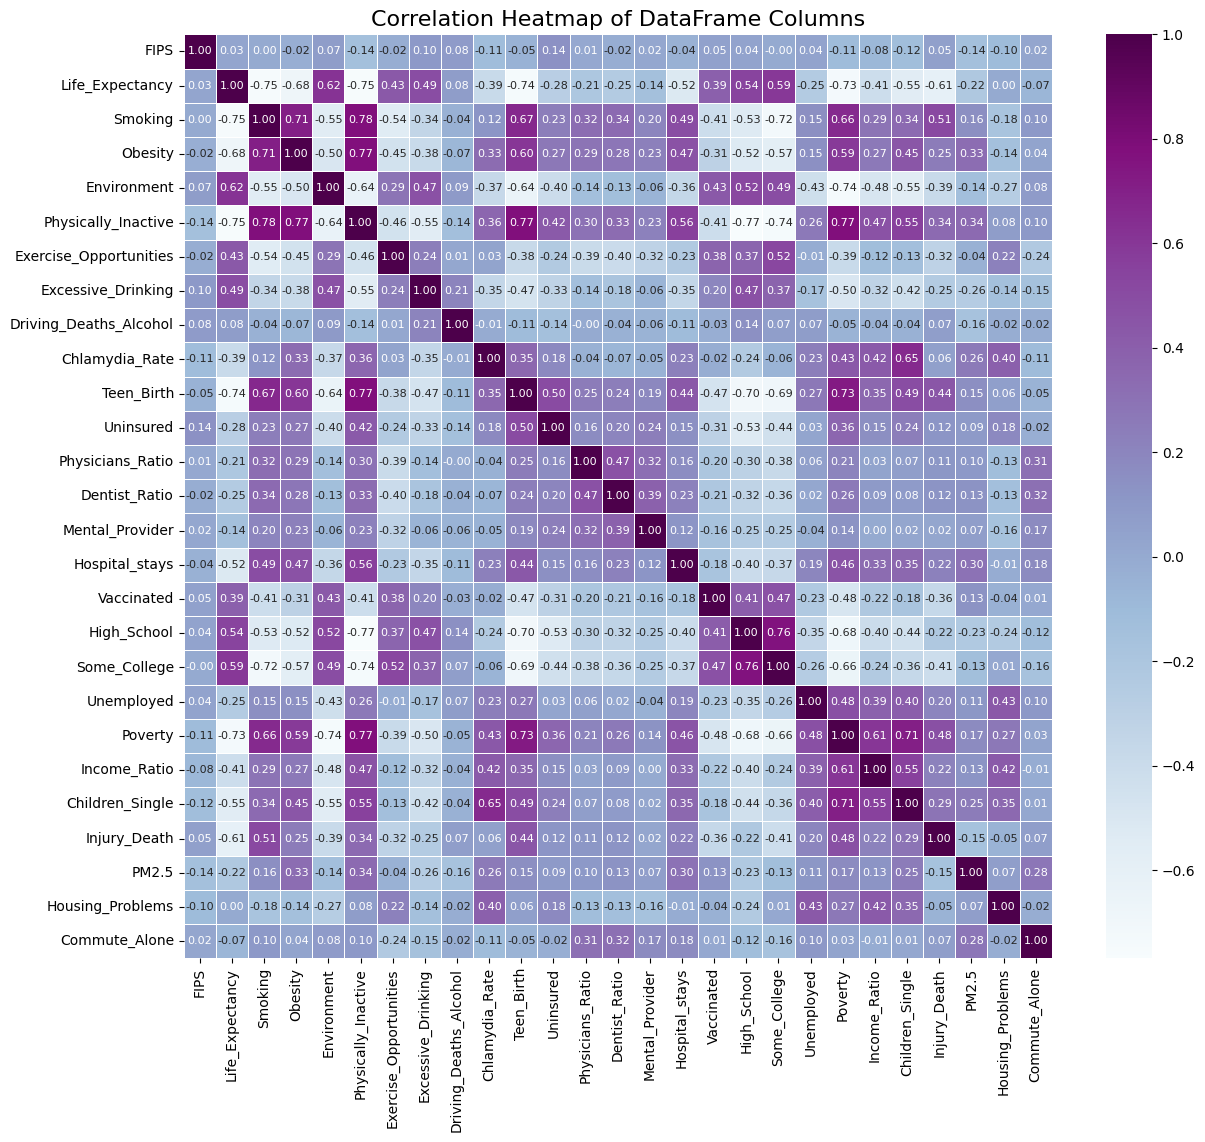

In [4]:
# Create a correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Assuming 'correlation_matrix' is already calculated as in your previous code
plt.figure(figsize=(14, 12))  # Adjust the figure size for better aspect ratio

# Create the heatmap with a chosen color palette and add space between cells
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=.5, annot_kws={"size": 8})

# Adding a title and adjusting font size
plt.title('Correlation Heatmap of DataFrame Columns', fontsize=16)

# Show the plot with adjustments
plt.show()

## **Correlation Matrix Graph Analysis**

- **Life Expectancy**:
  - Life expectancy shows strong negative correlations with smoking (-0.75), physical inactivity (-0.75), and teen birth rates (-0.74), suggesting that as these factors increase, life expectancy tends to decrease.
  - There are moderate positive correlations with environment (0.62) and higher education levels such as high school (0.54) and some college (0.59), indicating that better environmental conditions and higher education are associated with longer life expectancy.

- **Health Behaviors**:
  - Smoking has a strong positive correlation with physical inactivity (0.78) and obesity (0.71), which may imply a clustering of unhealthy behaviors.
  - Excessive drinking is moderately negatively correlated with physical inactivity (-0.55) and somewhat positively correlated with environmental quality (0.47).

- **Socioeconomic Factors**:
  - Poverty shows strong positive correlations with physical inactivity (0.77) and smoking (0.66), and a strong negative correlation with life expectancy (-0.73), reflecting the significant impact of socioeconomic status on health.
  - Unemployment has a moderate positive correlation with poverty (0.48) and a smaller negative correlation with life expectancy (-0.25).

- **Healthcare Access and Quality**:
  - There are negative correlations between life expectancy and the ratios of uninsured (-0.28), indicating that higher numbers of uninsured individuals are linked with lower life expectancy.
  - Hospital stays are moderately positively correlated with smoking (0.49) and obesity (0.47), suggesting that poor health behaviors may lead to more frequent hospitalizations.

- **Environmental Factors**:
  - A better environment is moderately positively correlated with life expectancy (0.62) and negatively correlated with poverty (-0.74) and teen birth rates (-0.64), indicating a link between environmental quality and overall health outcomes.

- **Education**:
  - Higher levels of education, such as high school and some college education, have strong negative correlations with smoking and physical inactivity, which suggests that education might play a role in promoting healthier lifestyles.

- **Children in Single-Parent Households**:
  - This factor has strong positive correlations with poverty (0.71) and a moderate negative correlation with life expectancy (-0.55), highlighting the potential challenges faced by single-parent households in terms of economic well-being and health.

- **Air Quality (PM2.5)**:
  - The PM2.5 air quality index shows a small negative correlation with life expectancy (-0.22), indicating that poorer air quality might be associated with reduced life expectancy, although the correlation is not very strong.

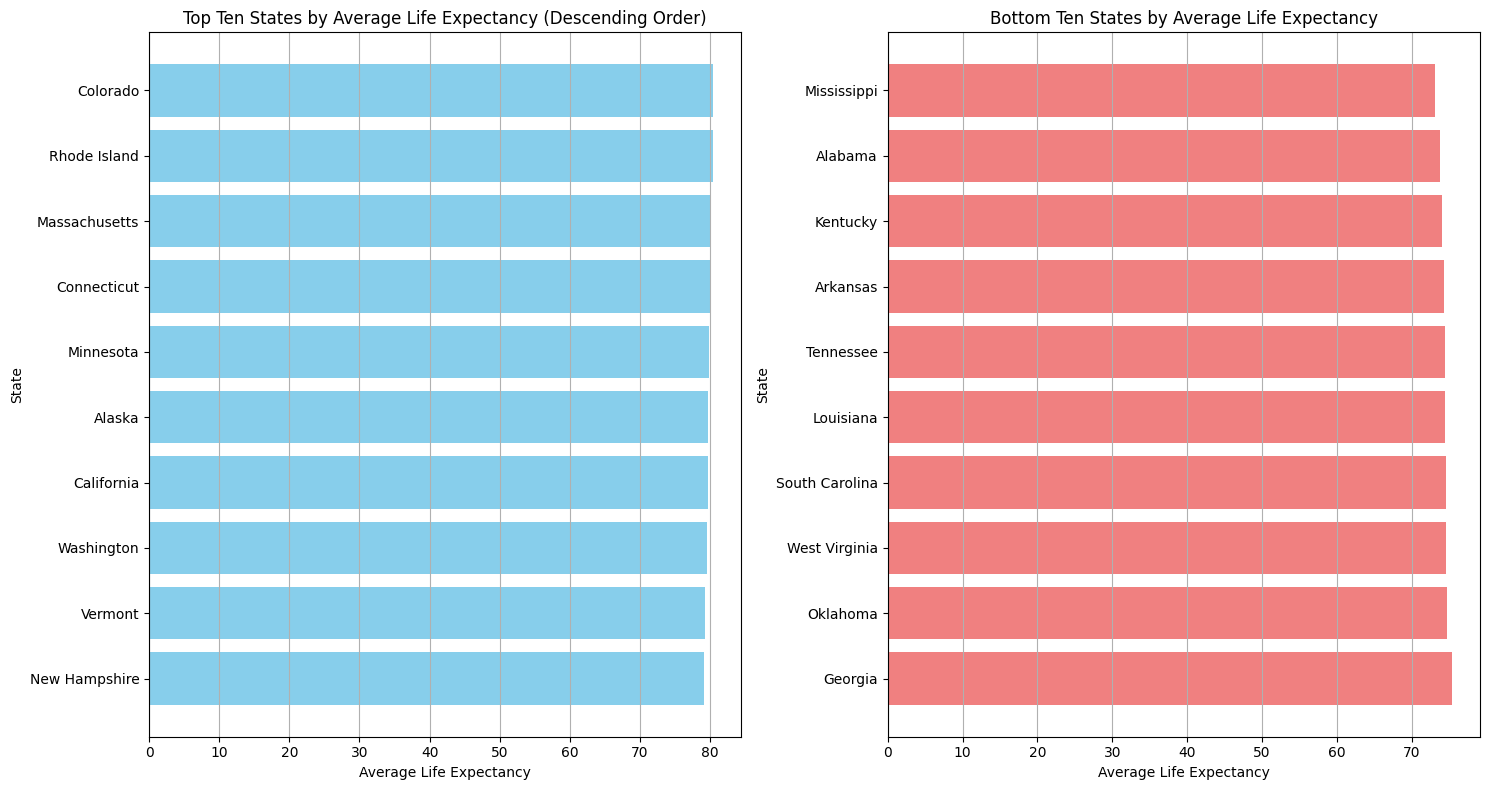

In [5]:
# Calculate average life expectancy for each state
average_life_expectancy = df.groupby('State')['Life_Expectancy'].mean().reset_index()

# Sort the data by average life expectancy in descending order
sorted_data = average_life_expectancy.sort_values(by='Life_Expectancy', ascending=False)

# Split the data into top and bottom ten states
top_ten = sorted_data.head(10)
bottom_ten = sorted_data.tail(10)

# Create subplots with two bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Bar chart for top ten states (descending order)
ax1.barh(top_ten['State'][::-1], top_ten['Life_Expectancy'][::-1], color='skyblue')
ax1.set_xlabel('Average Life Expectancy')
ax1.set_ylabel('State')
ax1.set_title('Top Ten States by Average Life Expectancy (Descending Order)')
ax1.grid(axis='x')

# Bar chart for bottom ten states
ax2.barh(bottom_ten['State'], bottom_ten['Life_Expectancy'], color='lightcoral')
ax2.set_xlabel('Average Life Expectancy')
ax2.set_ylabel('State')
ax2.set_title('Bottom Ten States by Average Life Expectancy')
ax2.grid(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

The first barchart in Figure 2 displays the top ten states in descending order of life expectancy, with each state represented by a horizontal bar in a soothing skyblue color. The second barchart illustrates the bottom ten states in a distinct lightcoral shade.

Colorado, Rhode Island, Massachusetts, Connecticut, Minnesota, Alaska, California, Washington, Vermont, and New Hampshire are the top ten states with the highest life expectancy, whereas, Mississippi, Alabama, Kentucky, Arkansas, Tennessee, Arkansas, Kentucky, Alabama, and Mississippi are the ten states with the lowest life expectancy.


## **Average Life Expectancy By State Graph Analysis**

The above graph explores the average life expectancy for each state and sorts the result. Colorado, Rhode Island, Massachusetts, Connecticut, and Minnesota are the top five states with the highest life expectancy, whereas, Tennessee, Arkansas, Kentucky, Alabama, and Mississippi are the five states with the lowest life expectancy.

In [ ]:
predictor_columns = df.drop(['State', 'County'], axis=1).columns

# Group by 'state' and calculate the mean for each predictor variable
grouped_by_state = df.groupby('State')[predictor_columns].mean()

# Get the state with the highest average for each predictor variable
max_state = grouped_by_state.idxmax()

# Display the predictor variable and the state with the highest average
for predictor in predictor_columns:
    max_value = grouped_by_state[predictor].max()
    state_with_max = max_state[predictor]
    print(f"For predictor '{predictor}', the state with the highest average is '{state_with_max}' with an average of {max_value:.3f}")

## **Predictor Variable Analysis**

The above output analizes the predictor variables individuallly, and specifically explores which states have the highest average of each variable. For example, 'Smoking' is highest in Kentucky, 'Obesity' is highest in Mississippi, and 'Unemployed' is highest in California. Below is a list that contains each predictor variable along with which state has the highest average of the predictor.

* Wyoming, FIPS
* Colorado, Life_Expectancy
* Kentucky, Smoking
* Mississippi, Obesity
* North Dakota, Environment
* Louisiana, Physically_Inactive
* District of Columbia, Exercise_Opportunities
* Wisconsin, Excessive_Drinking
* Montana, Driving_Deaths_Alcohol
* District of Columbia, Chlamydia_Rate
* Arkansas, Teen_Birth
* Texas, Uninsured
* Missouri, Physicians_Ratio
* Georgia, Dentist_Ratio
* Texas, Mental_Provider
* West Virginia, Hospital_stays
* Delaware, Vaccinated
* Alaska, High_School
* District of Columbia, Some_College
* California, Unemployed
* Mississippi, Poverty
* District of Columbia, Income_Ratio
* District of Columbia, Children_Single
* West Virginia, Injury_Death
* Georgia, PM2.5
* California, Housing_Problems
* District of Columbia, Commute_Alone





# **Preprocessing section – Process Flow Diagram of the Entire Modeling Process**


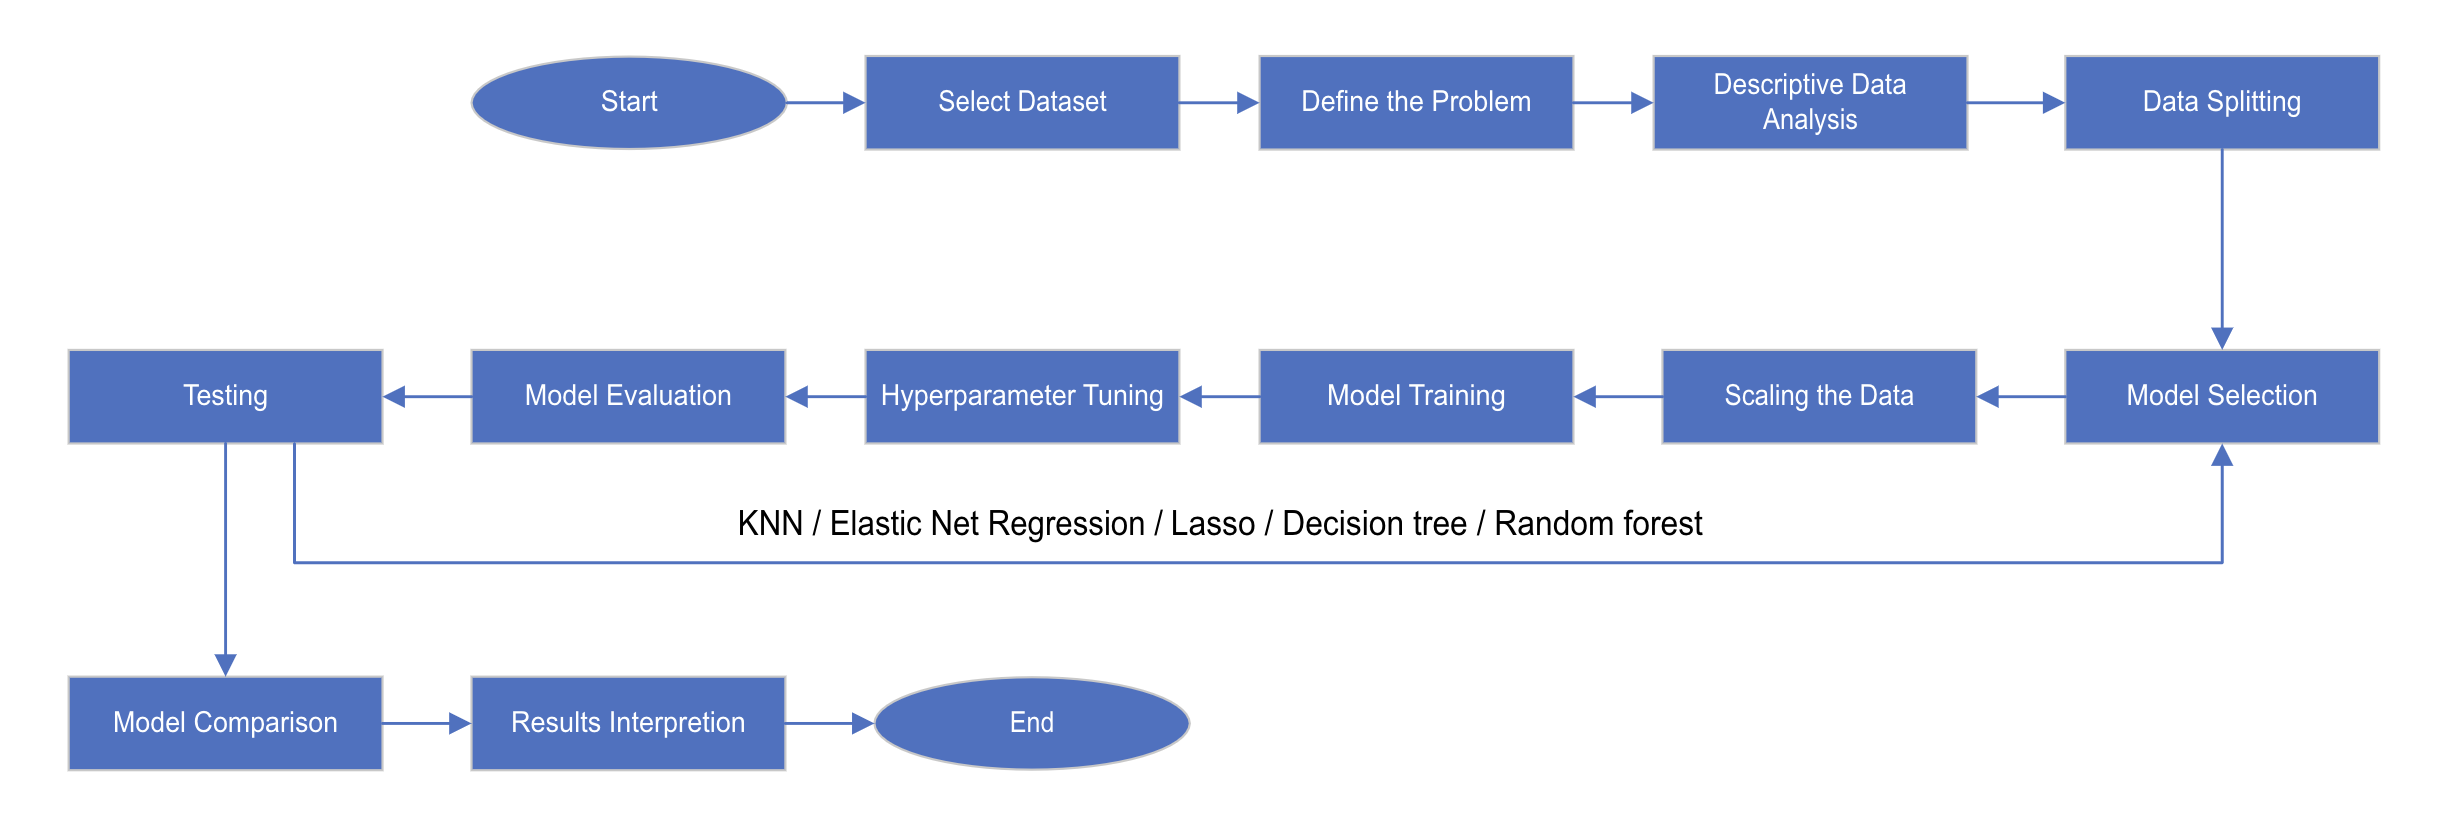


In this machine learning modeling process, we embark on a comprehensive journey to predict life expectancy using a dataset meticulously selected for its relevance to the problem at hand. Starting with the initial step of dataset selection, we delve into a systematic approach. Following the definition of the problem, we engage in a Descriptive Analysis to unravel the intricacies of the dataset, employing visualization techniques to discern patterns and correlations. Subsequently, we partition the data into training, validation, and testing sets for robust model evaluation. The heart of the process lies in the selection of machine learning algorithms, where we employ a diverse set of approaches including K-Nearest Neighbors (KNN), Elastic Net Regression, Lasso Regression, Decision Trees, and Random Forests. The iterative nature of the modeling process unfolds through loops spanning model training, hyperparameter tuning, evaluation, and testing, ensuring a meticulous refinement of the models. A crucial juncture involves model comparison, where the strengths and weaknesses of each method are scrutinized, paving the way for an informed selection of the final model.

Specifically, in each step we did the following work:

·   	Select dataset: A crucial starting point involves choosing the dataset focusing on life expectancy. The dataset selection is pivotal, laying the foundation for subsequent analyses.
·   	Define the problem: Clearly articulating the problem sets the stage for a targeted and purpose-driven modeling process. Understanding the nuances of the life expectancy prediction task is essential for effective model development.
·   	Descriptive Data Analysis: Visualizing and analyzing the distribution of data provides insights into the characteristics of the dataset. Identifying patterns and correlations through descriptive analysis in feature selection and informs subsequent modeling decisions.
·   	Data Splitting: Dividing the dataset into training, validation, and testing sets is a critical step to ensure the model's ability to generalize to new, unseen data. This separation helps in assessing the model's performance on various datasets.
·   	Model Selection: Choosing from a suite of machine learning algorithms, including K-Nearest Neighbors (KNN), Elastic Net Regression, Lasso Regression, Decision Trees, and Random Forests, demonstrates a comprehensive approach to tackling the life expectancy prediction problem.
·   	Scaling the data: Scaling is performed to standardize the range of features, ensuring that no particular feature dominates the modeling process. This step is particularly important when using algorithms sensitive to the scale of input features, such as K-Nearest Neighbors and regression models.
·   	Model Training: The selected models are trained on the training dataset, allowing them to learn patterns and relationships within the data. This step is crucial for the subsequent fine-tuning and optimization of the models.
·   	Hyperparameter Tuning: Fine-tuning the hyperparameters of each model optimizes their performance. This iterative process involves adjusting parameters to achieve the best possible predictive accuracy on the validation dataset.
·   	Model Evaluation: Models are evaluated on the validation dataset using appropriate metrics, such as accuracy, precision, recall, or F1 score. The evaluation stage is pivotal for identifying the models that perform best under specific conditions.
·   	Testing: Assessing the final models on a separate testing dataset ensures their generalization to new, unseen data. This step is crucial for determining the real-world performance of the models.
·   	Model Comparison: A thorough comparison of the strengths and weaknesses of each method provides valuable insights for selecting the most suitable model for the life expectancy prediction task.
·   	Results Interpretation: Communicating the results and insights gained from the models to relevant stakeholders involves interpreting the predictive capabilities of the chosen models and their implications for understanding life expectancy determinants.

By employing this systematic and iterative approach, our modeling process encompasses the entire lifecycle of developing, fine-tuning, and selecting the most effective machine learning models for predicting life expectancy. This comprehensive strategy ensures a nuanced understanding of the data and empowers stakeholders with actionable insights.



# **Model Comparison – Show the Performance of at least 5 Different ML Models**



## **Data Splitting**

In [6]:
# Preparing the data
X = df.drop(['Life_Expectancy', 'State', 'County', 'FIPS'], axis=1)  # Dropping non-numerical or target columns
y = df['Life_Expectancy']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2041, 25)
(511, 25)
(2041,)
(511,)


## **KNN**
The K-Nearest Neighbors (KNN) algorithm was employed to predict life expectancy, varying the number of neighbors considered (k) during the model evaluation. The model was assessed based on the Mean Squared Error (MSE) on the test set for different values of k.

The results reveal a pattern where the test MSE decreases as k increases until reaching a minimum at k = 9, with a corresponding MSE of 2.056. This suggests that, for this specific dataset, a moderate level of neighborhood aggregation (k = 9) results in the most accurate predictions. As the number of neighbors increases beyond this point, the model experiences a slight increase in MSE, indicating a diminishing benefit from additional neighbors. Overall, the KNN model demonstrates good predictive performance, particularly when considering the optimal value of k as determined by minimizing the test MSE.


In [ ]:
# Scaling the features
sc = StandardScaler()

x_train_sc = sc.fit_transform(X_train)  # fits and transforms x_train
x_test_sc = sc.transform(X_test)

# Define the range of neighbors
neighbors = np.arange(1, 12)
neighbors

# Lists to store results
mse_values = []
rmse_values = []

# Loop through each value of k
# Loop through each value of k
for k in neighbors:
    # Create a KNN regressor with a specified number of neighbors
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    # Fit the model to the training data
    knn_regressor.fit(x_train_sc, y_train)

    # Make predictions on the test set
    y_pred = knn_regressor.predict(x_test_sc)

    # Evaluate the model
    knn_mse = mean_squared_error(y_test, y_pred)
    mse_values.append(knn_mse)  # Append MSE value to the list
    knn_rmse = np.sqrt(knn_mse)
    rmse_values.append(knn_rmse)

    # Print results for each k with formatted RMSE
    print(f'k = {k}: Test RMSE = {knn_rmse:.3f}')

# If you want to find the best k based on the minimum cross-validated RMSE
best_k = neighbors[np.argmin(rmse_values)]
print(f'Best k based on RMSE: {best_k}')


In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors, mse_values, label='Test MSE')
plt.title('Mean Squared Error for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## **LASSO**

The LASSO Regression Analysis yields a RMSE of 1.429, indicating the model's prediction accuracy. The analysis shows a sparse distribution of coefficients, characteristic of LASSO's feature selection capability. Key negative influences include 'Obesity', 'Teen Birth', 'Smoking', and 'Injury Death', indicating strong inverse relationships with the target variable. In contrast, 'Exercise Opportunities' and 'Driving Deaths Alcohol' show a slight positive influence. Most variables, such as 'Physicians Ratio' and 'Environment', have zero coefficients, suggesting no significant impact.

Overall, the results highlight the most impactful factors, underscoring LASSO's efficiency in isolating critical predictors.

This following plot presents MSE values as the regularization parameter alpha increases. Both training and test errors decrease and then increase, with a low point that suggests an optimal alpha value. The convergence of training and test errors indicates good generalization at this alpha. However, as alpha continues to rise, both errors escalate, indicating over-regularization where the model becomes too simplistic, losing predictive accuracy on both the training and unseen test data.

In [ ]:
# Creating the LASSO model
lasso = Lasso()  # You can adjust the alpha value

# Training the model
lasso.fit(X_train, y_train)

# Predicting and Evaluating the model
y_pred = lasso.predict(X_test)
la_mse = mean_squared_error(y_test, y_pred)

# Formatting and printing the results
print("LASSO Regression Analysis Results:")
print("----------------------------------")
print(f"Mean Squared Error: {la_mse:.3f}\n")  # formatted to 3 decimal places

print("LASSO Coefficients (sorted):")
print("----------------------------")
coefficients = sorted(zip(X.columns, lasso.coef_), key=lambda x: x[1], reverse=True)
for feature, coef in coefficients:
    print(f"{feature}: {coef:.3f}")  # formatted to 3 decimal places

# You may also want to print the intercept with similar formatting
print("\nLASSO Intercept:")
print(f"{lasso.intercept_:.3f}")

In [ ]:
# Preparing the data
X = df.drop(['Life_Expectancy', 'State', 'County', 'FIPS'], axis=1)  # Dropping non-numerical or target columns
y = df['Life_Expectancy']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Values of alpha (regularization strength) to try
alphas = np.logspace(-2, 3, 200)
train_errors = []
test_errors = []

# Training Lasso models and recording the MSE for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    train_predictions = lasso.predict(X_train)
    test_predictions = lasso.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_predictions))
    test_errors.append(mean_squared_error(y_test, test_predictions))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train error', color='blue')
plt.plot(alphas, test_errors, label='Test error', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs. Alpha for Lasso Regression')
plt.legend()
plt.show()


## **Ridge Regression**

In [ ]:
# Assuming df is your DataFrame
# Preparing the data
X = df.drop(['Life_Expectancy', 'State', 'County', 'FIPS'], axis=1)  # Dropping non-numerical or target columns
y = df['Life_Expectancy']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Ridge model
ridge = Ridge()  # You can adjust the alpha value

# Training the model
ridge.fit(X_train, y_train)

# Predicting and Evaluating the model
y_pred = ridge.predict(X_test)
ri_mse = mean_squared_error(y_test, y_pred)

# Formatting and printing the results
print("Ridge Regression Analysis Results:")
print("----------------------------------")
print(f"Mean Squared Error: {ri_mse:.3f}\n")  # formatted to 3 decimal places

print("Ridge Coefficients (sorted):")
print("----------------------------")
coefficients = sorted(zip(X.columns, ridge.coef_), key=lambda x: x[1], reverse=True)
for feature, coef in coefficients:
    print(f"{feature}: {coef:.3f}")  # formatted to 3 decimal places

# You may also want to print the intercept with similar formatting
print("\nRidge Intercept:")
print(f"{ridge.intercept_:.3f}")

## **Elastic Net Regression**

The Elastic Net regression model was employed to predict life expectancy, with a focus on varying the model's alpha and l1_ratio parameters during evaluation. The assessment was based on the RMSE on the test set for different combinations of these parameters.

It was observed that the test RMSE initially decreases as the balance between alpha and l1_ratio is optimized, indicating improved model performance. Also, with the implementation of GridsearchCV method, the RMSE decreased from 1.68 to 1.34.

The model achieves optimal performance at a specific combination of alpha (0.01) and l1_ratio (0.25), resulting in the lowest RMSE (1.34).

The following MSE plot for ElasticNet Regression indicates an optimal alpha region where both training and test errors are minimized, suggesting a balance between bias and variance. As alpha increases past the optimal point, MSE rises for both training and test data, signaling over-regularization. The close proximity of the train and test lines at higher alpha values denotes that while the model's complexity is reduced, it is at the cost of predictive power, with the model underfitting both the training and test datasets.


In [ ]:
# Feature scaling (important for models with regularization)
scaler = StandardScaler()
en_X_train_scaled = scaler.fit_transform(X_train)
en_X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a base model
elastic_net = ElasticNet(max_iter=10000)  # Increase the max_iter value

# Using ElasticNetCV to find the best alpha and l1_ratio
elastic_net_cv = ElasticNetCV(alphas=[0.01, 0.1, 1, 10, 100],
                              l1_ratio=[0.01, 0.1, 0.5, 0.75, 1.0],
                              max_iter=20000,
                              cv=5)

elastic_net_cv.fit(en_X_train_scaled, y_train)

print(f"Best alpha: {elastic_net_cv.alpha_:.3f}")
print(f"Best l1 ratio: {elastic_net_cv.l1_ratio_:.3f}")

en_y_pred = elastic_net_cv.predict(en_X_test_scaled)

# Check the MSE for the model
en_mse = mean_squared_error(y_test, en_y_pred)
en_rmse = np.sqrt(en_mse)
print(f"RMSE: {en_rmse:.3f}")

In [ ]:
# Assuming you have an ElasticNet model defined as elastic_net
elastic_net = ElasticNet(max_iter=10000)  # Increase max_iter

# Update the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.25, 0.5, 0.75, 1.0]  # Start from 0.1 instead of 0.0
}

# Instantiate and fit the grid search model
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(en_X_train_scaled, y_train)

# View the best parameters
print("Best Parameters:", grid_search.best_params_)


In [ ]:
#Train the Elastic Net model using the optimal hyperparameters obtained from the previous step

# Extracting the best parameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Creating a new model with the best parameters
elastic_net_optimized = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

# Fitting the model to the training data
elastic_net_optimized.fit(en_X_train_scaled, y_train)


In [ ]:
# Evaluate the model's performance using the test set

# Making predictions on the test set
en_y_pred = elastic_net_optimized.predict(en_X_test_scaled)

# Calculating evaluation metrics
en_mse = mean_squared_error(y_test, en_y_pred)
en_rmse = np.sqrt(en_mse)

print(f"Root Mean Squared Error: {en_rmse:.3f}")

In [ ]:
# Simulating some data (replace this with your actual dataset)
X, y = np.random.rand(100, 10), np.random.rand(100)

# Values of alpha (regularization strength) to try
alphas = np.logspace(-2, 3, 200)
train_errors = []
test_errors = []

# Training ElasticNet models and recording the MSE for each alpha
for alpha in alphas:
    model = ElasticNet(alpha=alpha)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_predictions))
    test_errors.append(mean_squared_error(y_test, test_predictions))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train error', color='blue')
plt.plot(alphas, test_errors, label='Test error', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs. Alpha for ElasticNet Regression')
plt.legend()
plt.show()


## **Decision Tree**

The decision tree model was tuned using GridSearchCV, and the optimal hyperparameter configuration was found to be with a maximum of 10 leaf nodes ('max_leaf_nodes': 10).

 This parameter was chosen to strike a balance between model complexity and predictive accuracy, preventing overfitting to the training data. The model demonstrated strong predictive performance on the test set, with a Mean Squared Error (MSE) of 3.23. This indicates that, on average, the predicted life expectancy values deviated by approximately 3.23 units from the actual values. Moreover, the cross-validation MSE, a metric that assesses generalization performance, yielded a similar value of 3.87. The proximity of the test and cross-validation MSE values suggests that the model generalizes well to new, unseen data.

 Overall, the decision tree with the selected hyperparameter configuration proves to be an effective and robust predictor of life expectancy in the given dataset.

In [8]:
# Define the Decision Tree model
dt_reg = DecisionTreeRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {'max_leaf_nodes': list(range(2, 11))}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
best_dt_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best 'max_leaf_nodes': {best_max_leaf_nodes}")

# Get the best MSE and best cross-validation MSE
best_mse = mean_squared_error(y_test, best_dt_model.predict(X_test))
best_cv_mse = -grid_search.best_score_

# Print the best MSE and best cross-validation MSE
print(f"Best MSE: {best_mse:.3f}")
print(f"Best Cross-Validation MSE: {best_cv_mse:.3f}")

# Calculate the best RMSE
best_rmse = np.sqrt(best_mse)

# Print the best RMSE
print(f"Best RMSE: {best_rmse:.3f}")

Best 'max_leaf_nodes': 10
Best MSE: 3.229
Best Cross-Validation MSE: 3.866
Best RMSE: 1.797


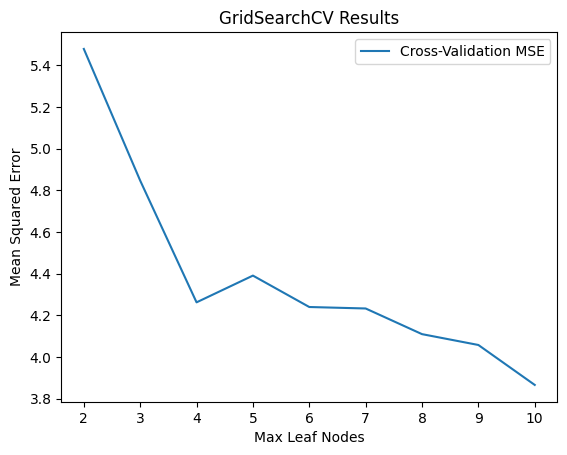

In [9]:
# Get the training MSE and cross-validation MSE for each max_leaf_nodes

cv_mse = -grid_search.cv_results_['mean_test_score']

# Plotting both MSE and cross-validation MSE for each max_leaf_nodes
plt.plot(list(range(2, 11)), cv_mse, label='Cross-Validation MSE')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Mean Squared Error')
plt.title('GridSearchCV Results')
plt.legend()
plt.show()

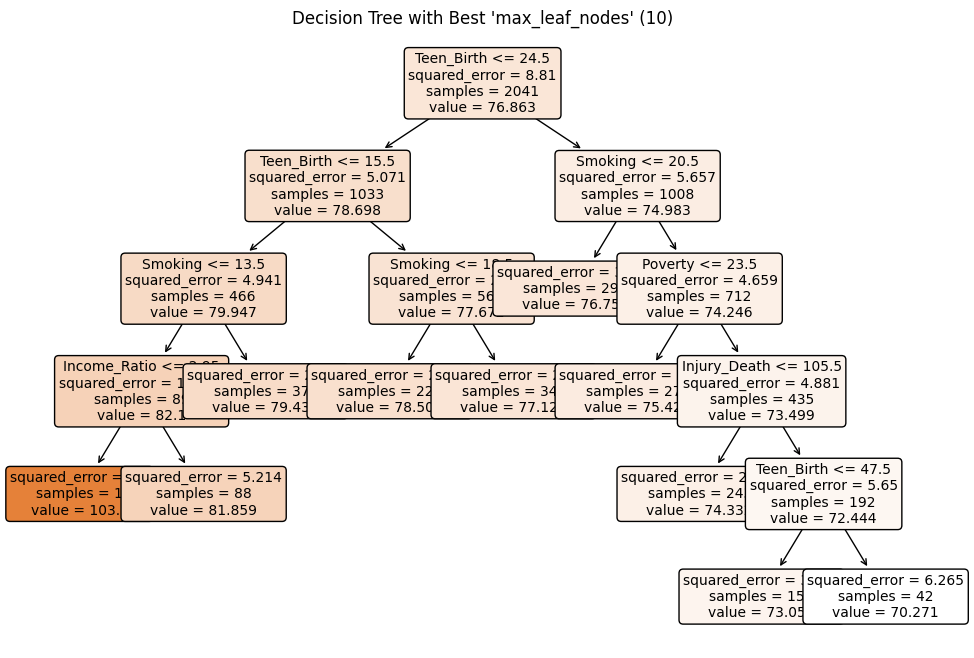

In [10]:
# Visualizing the best decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title(f"Decision Tree with Best 'max_leaf_nodes' ({best_max_leaf_nodes})")
plt.show()

## **Random Forest**

The code for Random Forest predicts life expectancy from various factors. Its performance was measured using the Root Mean Squared Error (RMSE). Additionally, A graph was created to show which factors had the most significant influence on predicting life expectancy. In this data set, exercise oppurtunities was the feature that had the greatest influence on predicting the target of life expectancy.

Afterwards, we used hyperparameter tuning to find the best parameters that yielded the best RMSE. This helped find the best combinations of parameters to improve the model's accuracy. The refined model had a RMSE of 1.355.

From the below chart, we found that exercise opportunities emerged as the most influential predictor for life expectancy, while income ratio showed the least impact. Also, by tweaking the hyperparameter tuning, we significantly improved accuracy of the model.

In [ ]:
#code for random forest

rf = RandomForestRegressor(random_state = 42)

rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

In [ ]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

names = [df.columns[i] for i in indices]

plt.figure(figsize = (15, 5))

plt.title('Feature Importance')

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation = 90)

plt.show()

In [ ]:
param_grid = {
    'max_depth': [10, 20, 30, 40, None],
    'max_features': [2, 3, 4, 'sqrt', 'log2'],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred_tuned = best_rf.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print(f"Tuned RandomForestRegressor RMSE: {rmse_tuned:.3f}")
print(f"Best Parameters: {grid_search.best_params_}")

## **Model Comparison**
In a comparative analysis of five regression models using Root Mean Squared Error (RMSE) as the evaluation metric, notable differences in predictive performance were observed.

KNN showed an RMSE of 1.443, suggesting reasonable performance but potentially indicating sensitivity to the choice of neighbors.

Lasso, with an RMSE of 1.429, demonstrated a slightly improved predictive accuracy, likely benefiting from its feature selection capabilities.

Random Forest, a robust ensemble model, showed an RMSE of 1.355, closely competing with linear models and demonstrating its strength in capturing complex, non-linear relationships.

Decision Tree, the most interpretable model for this dataset, showed an RMSE of 1.797, which is the highest among the six models. This reflects the classic trade-off in data science: while it's easily understandable, its accuracy is surpassed by more complex models, highlighting the necessity of balancing simplicity with predictive precision in modeling.

Elastic Net, combining features of both Lasso and Ridge, yielded the best performance among the linear models, with an RMSE of 1.342, suggesting an optimal balance of regularization and feature selection.


This comparative assessment highlights the nuanced trade-offs between model simplicity and predictive accuracy, with Elastic Net slightly edging out as the most effective model for this specific dataset.

In the below variable importance plot, 'Injury_death' appears as the most influential factor, indicating its strong impact on the model's predictions. ‘Teen_birth’ and 'smoking' follow, showing significant but lesser influence. This hierarchy of variables reveals the key drivers in the dataset, with 'Injury_death' being pivotal.

In [ ]:
print(f'KNN RMSE: {np.sqrt(knn_mse):.3f}')
print(f'Lasso RMSE: {np.sqrt(la_mse):.3f}')
print(f'Ridge RMSE: {np.sqrt(ri_mse):.3f}')
print(f'Elastic Net RMSE: {en_rmse:.3f}')
print(f'Tuned RandomForestRegressor RMSE: {rmse_tuned:.3f}')

In [ ]:
# Example RMSE values for each model
rmse_values = {
    'KNN': np.sqrt(knn_mse),
    'Lasso': np.sqrt(la_mse),
    'Elastic Net': 1.342,
    'Random Forest': 1.355,
    'Decision Tree': 1.797
}

# Creating lists from the dictionary for plotting
models = list(rmse_values.keys())
rmse_scores = list(rmse_values.values())

# Inversely sorting the models by RMSE (highest to lowest)
inverse_sorted_models = sorted(rmse_values.items(), key=lambda x: x[1], reverse=True)
inverse_sorted_model_names = [model[0] for model in inverse_sorted_models]
inverse_sorted_rmse_scores = [model[1] for model in inverse_sorted_models]

# Creating the horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(inverse_sorted_model_names, inverse_sorted_rmse_scores, color='skyblue')

# Adding the value next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             round(bar.get_width(),2), va='center')

# Adding more details to make the plot informative
plt.ylabel('Models', fontsize=14)
plt.xlabel('RMSE', fontsize=14)
plt.title('Comparison of Model RMSEs (Lowest to highest)', fontsize=16)
plt.yticks(inverse_sorted_model_names, fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
# Extracting feature names and coefficients
feature_names = X_train.columns
abs_coefficients = np.abs(elastic_net_optimized.coef_)

# Sort in descending order by absolute coefficient values
sorted_indices = np.argsort(abs_coefficients)[::-1]
top_10_indices = sorted_indices[:10]
sorted_abs_coefficients = abs_coefficients[top_10_indices]
sorted_feature_names = [feature_names[i] for i in top_10_indices]

# Create the variable importance plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_abs_coefficients, color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Variable Importance Plot - Elastic Net Coefficients (Top 10)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# **Conclusion**

Our analysis of U.S. county-level health data using various machine learning models revealed significant insights into factors affecting life expectancy.

Key findings include the strong negative correlation of life expectancy with smoking, physical inactivity, and teen birth rates. Conversely, positive correlations were observed with environmental quality and higher education levels. Notably, socioeconomic factors like poverty and unemployment also showed significant correlations with health outcomes.

The utilization of analytics to extract insights from nationwide health data underscores the potential for informed decision-making. It is imperative for governments to leverage this valuable data resource to formulate effective policies that enhance the quality of life for their citizens.
